In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,8

In [77]:
df = pd.read_csv('E:\OTHER\monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [78]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [80]:
# Parsing String to Datetime
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by=['Month'])
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [81]:
# Quarterly_data= df.resample('Q',label='right', closed='left',on='Month').sum()
# Quarterly_data

In [82]:
df = df.set_index('Month')
df.columns=['Monthly_beer_production']
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


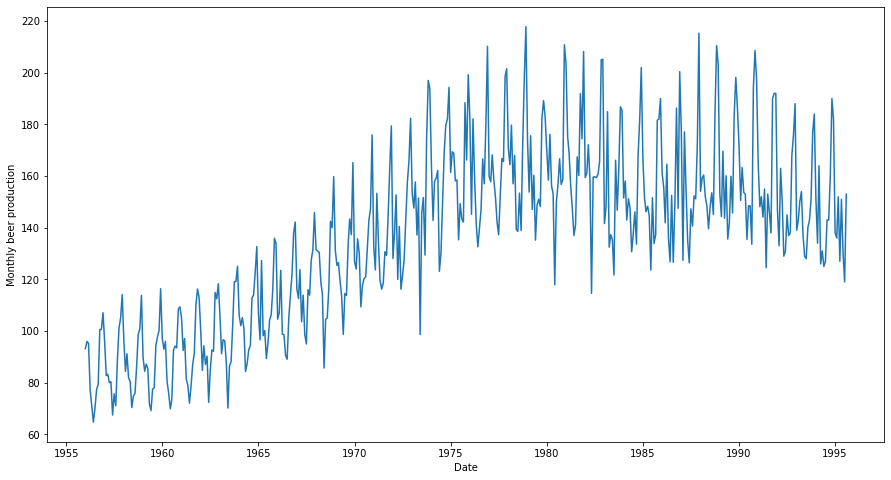

In [83]:
plt.xlabel('Date')
plt.ylabel('Monthly beer production')
plt.plot(df,scalex=True, scaley=True)

In [47]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

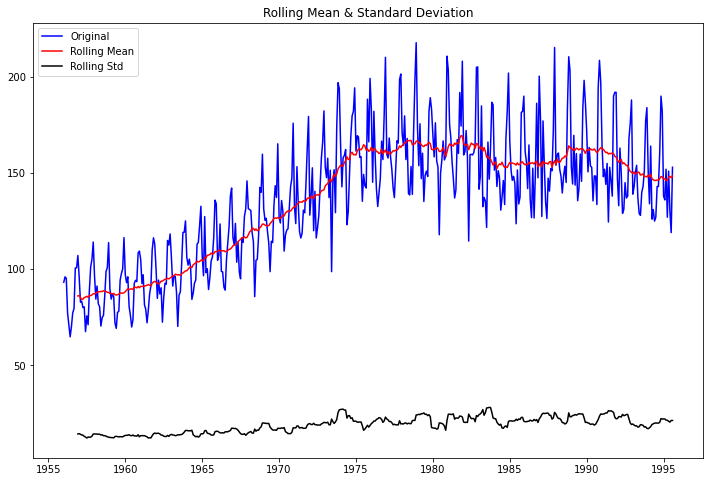

Results of Dickey-Fuller Test:
p-value = 0.2842. The series is likely non-stationary.
Test Statistic                  -2.005361
p-value                          0.284227
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [48]:
test_stationarity(df)

In [37]:
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller
# x = df['Monthly_beer_production'].values
# result=adfuller(x)
# print('ADF Statistic: %f' % result[0])
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.282661
	1%: -3.445
	5%: -2.868
	10%: -2.570


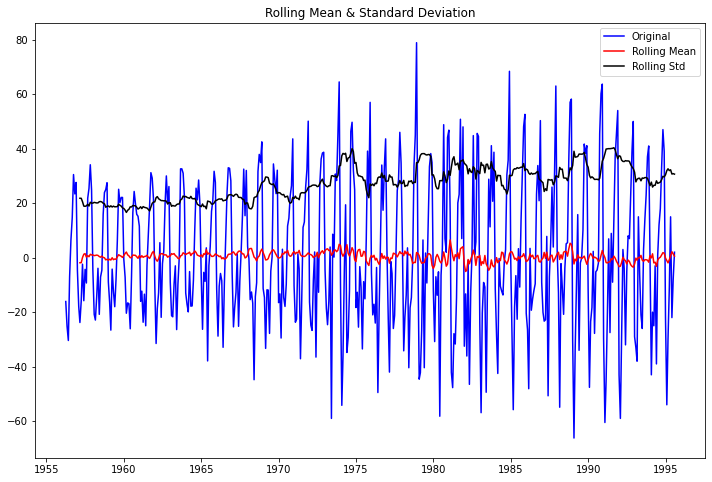

Results of Dickey-Fuller Test:
p-value = 0.0086. The series is likely stationary.
Test Statistic                  -3.476111
p-value                          0.008622
#Lags Used                      20.000000
Number of Observations Used    452.000000
Critical Value (1%)             -3.444900
Critical Value (5%)             -2.867956
Critical Value (10%)            -2.570187
dtype: float64


In [88]:
df['Beer_prod_difference']=df['Monthly_beer_production']- df['Monthly_beer_production'].shift(3)

test_stationarity(df['Beer_prod_difference'].dropna())

In [26]:
df

,Monthly_beer_production,Beer_prod_difference
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,NaN
1956-03-01,95.2,NaN
1956-04-01,77.1,-16.1
1956-05-01,70.9,-25.1
...,...,...
1995-04-01,127.0,-11.0
1995-05-01,151.0,15.0
1995-06-01,130.0,-22.0


In [52]:
new_df=df.copy()
new_df.dropna(inplace=True)

In [53]:
new_df

,Monthly_beer_production,Beer_prod_difference
Month,,
1956-04-01,77.1,-16.1
1956-05-01,70.9,-25.1
1956-06-01,64.8,-30.4
1956-07-01,70.1,-7.0
1956-08-01,77.3,6.4
...,...,...
1995-04-01,127.0,-11.0
1995-05-01,151.0,15.0
1995-06-01,130.0,-22.0


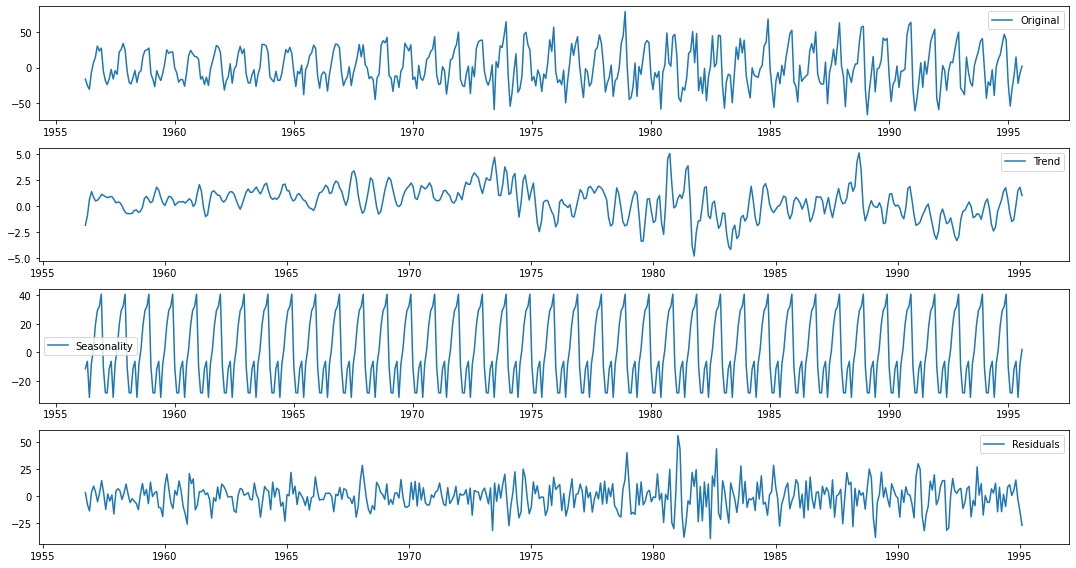

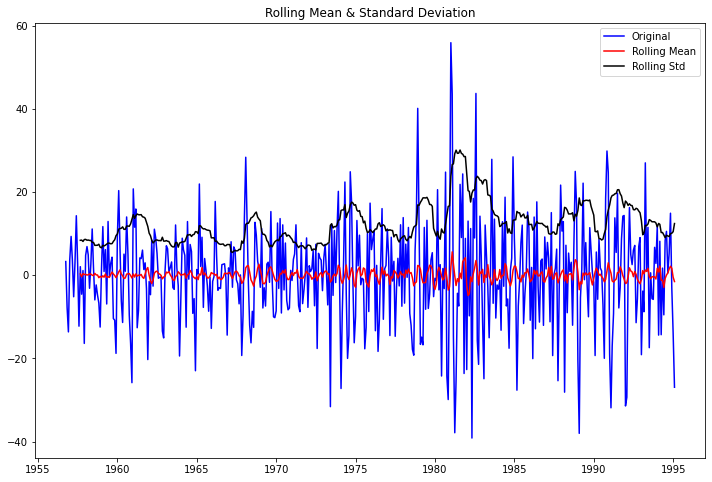

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.164001e+01
p-value                        2.158316e-21
#Lags Used                     1.800000e+01
Number of Observations Used    4.420000e+02
Critical Value (1%)           -3.445232e+00
Critical Value (5%)           -2.868101e+00
Critical Value (10%)          -2.570265e+00
dtype: float64


In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_df['Beer_prod_difference'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_df['Beer_prod_difference'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)


C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


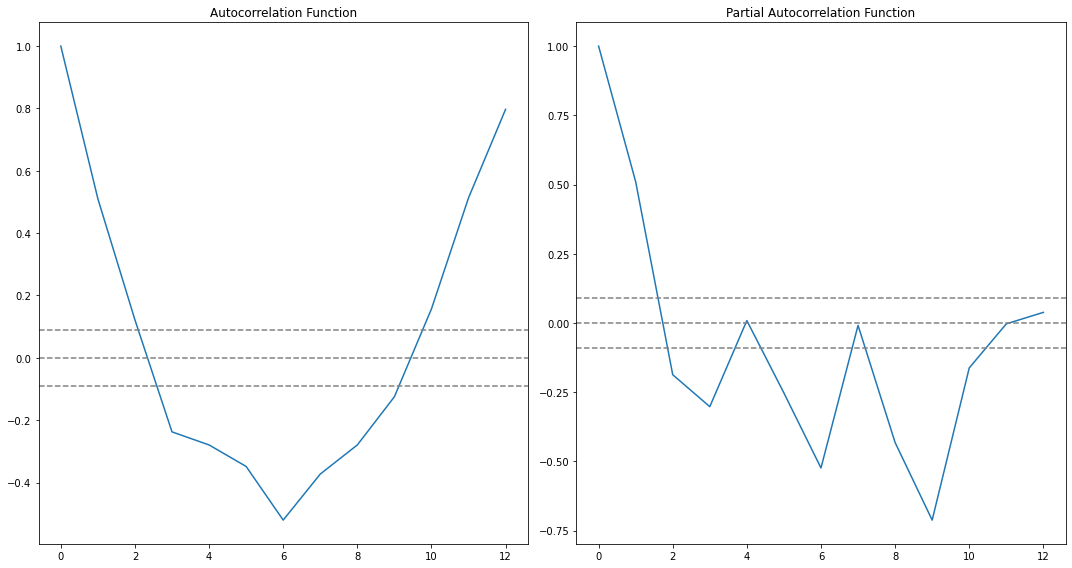

In [15]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(new_df['Beer_prod_difference'], nlags=12)
lag_pacf = pacf(new_df['Beer_prod_difference'], nlags=12, method='ols')

#Plot ACF: 
plt.subplot(121)
plt.plot(lag_acf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

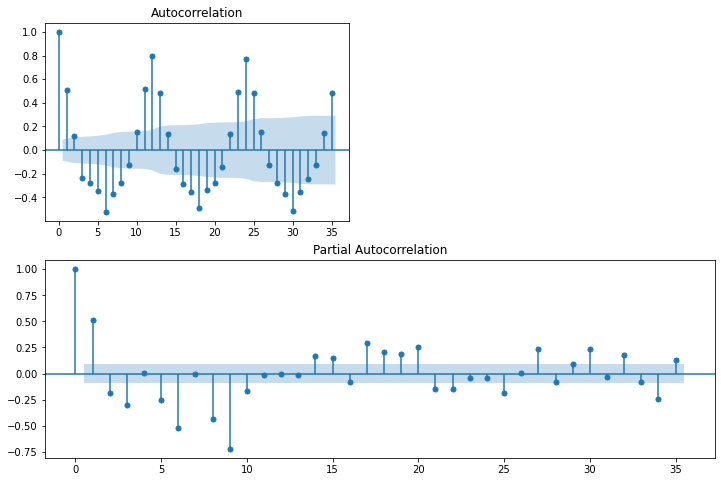

In [16]:
# p=2,d=0,q=1
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(new_df['Beer_prod_difference'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['Beer_prod_difference'],lags=35,ax=ax2)

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series= new_df['Beer_prod_difference']
# evaluate parameters
p_values = range(0,3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

<ipython-input-99-9e5c4f34fa3e>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ARIMA(0, 0, 0) RMSE=30.428
ARIMA(0, 0, 1) RMSE=26.936
ARIMA(0, 0, 2) RMSE=23.223
ARIMA(0, 1, 0) RMSE=31.198
ARIMA(0, 1, 1) RMSE=31.121
ARIMA(0, 1, 2) RMSE=27.721
ARIMA(0, 2, 0) RMSE=45.944
ARIMA(0, 2, 1) RMSE=31.240
ARIMA(0, 2, 2) RMSE=31.160
ARIMA(1, 0, 0) RMSE=26.873
ARIMA(1, 0, 1) RMSE=26.566
ARIMA(1, 0, 2) RMSE=23.034
ARIMA(1, 1, 0) RMSE=31.164
ARIMA(1, 1, 1) RMSE=29.229
ARIMA(1, 1, 2) RMSE=27.216
ARIMA(1, 2, 0) RMSE=40.328
ARIMA(1, 2, 1) RMSE=31.202
ARIMA(1, 2, 2) RMSE=31.322
ARIMA(2, 0, 0) RMSE=26.199
ARIMA(2, 0, 1) RMSE=23.214
ARIMA(2, 0, 2) RMSE=20.837
ARIMA(2, 1, 0) RMSE=31.170
ARIMA(2, 1, 1) RMSE=26.791
ARIMA(2, 1, 2) RMSE=27.043
ARIMA(2, 2, 0) RMSE=39.814
ARIMA(2, 2, 1) RMSE=31.218


# ARIMA Model

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Plotting AR Model


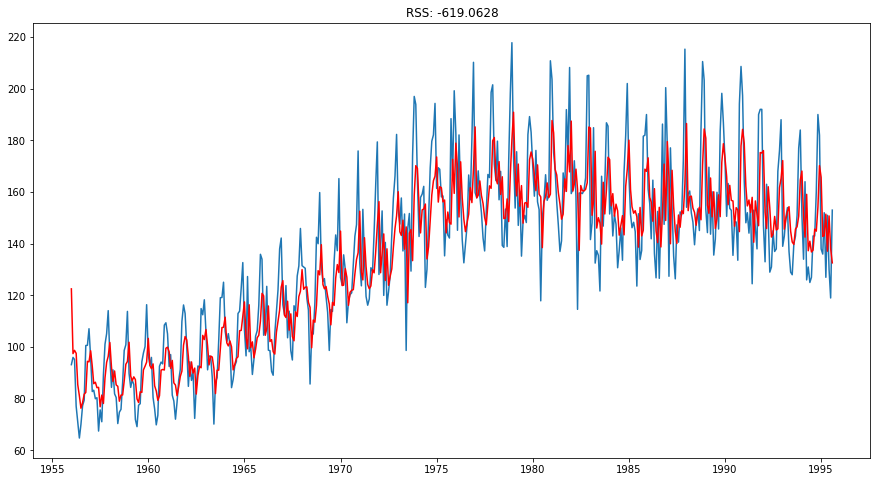

In [73]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df['Monthly_beer_production'], order=(2,0,2))
results_ar =model.fit(disp=1)
plt.plot(df['Monthly_beer_production'])
plt.plot(results_ar.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ar.fittedvalues - df['Monthly_beer_production'])))
print('Plotting AR Model')

In [71]:
model = ARIMA(df['Monthly_beer_production'],order=(2,0,2))
results_ar = model.fit()

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

<AxesSubplot:xlabel='Month'>

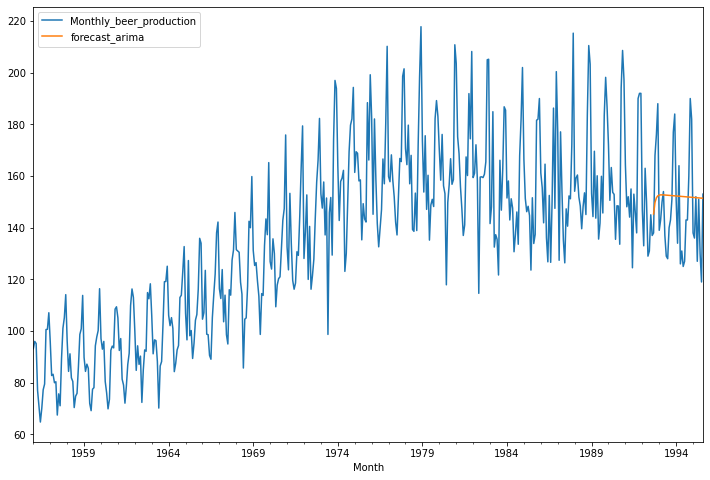

In [72]:
df['forecast_arima']=results_ar.predict(start=440,end=476,dynamic=True)
df[['Monthly_beer_production','forecast_arima']].plot(figsize=(12,8))

In [74]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=x) for x in range(0,25)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataframe_monthly = pd.concat([df,future_dates_df])

In [76]:
future_dataframe_monthly

,Monthly_beer_production,Beer_prod_difference,forecast_arima,forecast_sarima
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,NaN,NaN,NaN
1956-03-01,95.2,NaN,NaN,NaN
1956-04-01,77.1,-16.1,NaN,NaN
1956-05-01,70.9,-25.1,NaN,NaN
...,...,...,...,...
1997-04-01,NaN,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN,NaN


In [22]:
# date_rng = pd.date_range(start='2021-07-31', end='2022-06-30', freq='M')
# date_rng

In [23]:
# future_dates_df = pd.DataFrame(date_rng, columns=['adoptionDate'])
# future_dates_df['adoptionDate'] = pd.to_datetime(future_dates_df['adoptionDate'])
# future_dates_df = future_dates_df.set_index('adoptionDate')
# future_dataframe_monthly = pd.concat([monthly_dataset,future_dates_df])
# future_dataframe_monthly.tail(20)

<AxesSubplot:>

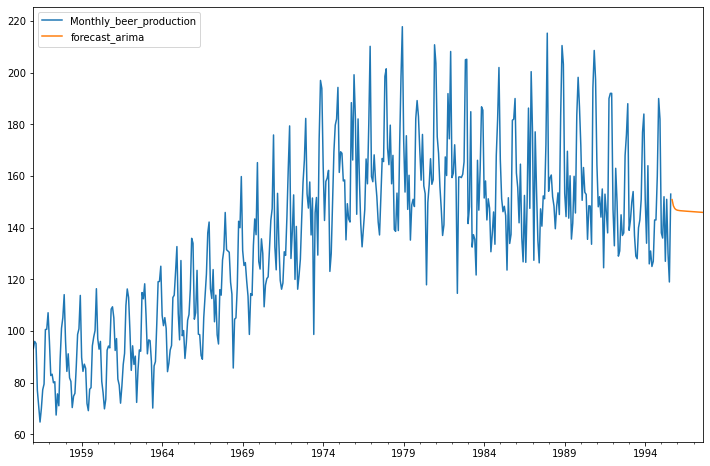

In [60]:

future_dataframe_monthly['forecast_arima']=results_ar.predict(start=476,end=500,dynamic=True)
future_dataframe_monthly[['Monthly_beer_production','forecast_arima']].plot(figsize=(12,8))

In [61]:
results_ar.forecast(13)

(array([150.88337746, 148.47208819, 147.44022438, 146.98593772,
        146.77350799, 146.66237484, 146.59368799, 146.54280779,
        146.49941798, 146.45919926, 146.42034317, 146.38209247,
        146.34413007]),
 array([17.29569032, 19.73155047, 20.34457846, 20.57253126, 20.69585091,
        20.78474179, 20.86066162, 20.9312105 , 20.99932433, 21.06618835,
        21.13229196, 21.19784043, 21.26292167]),
 array([[116.98444735, 184.78230758],
        [109.79895991, 187.14521648],
        [107.56558333, 187.31486544],
        [106.66451738, 187.30735806],
        [106.21038557, 187.33663041],
        [105.92502949, 187.39972018],
        [105.70754253, 187.47983345],
        [105.51838906, 187.56722652],
        [105.34149859, 187.65733737],
        [105.1702288 , 187.74816972],
        [105.00181203, 187.83887431],
        [104.83508867, 187.92909627],
        [104.66956938, 188.01869075]]))

## SARIMAX Model

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sar

Plotting SARIMAX Model


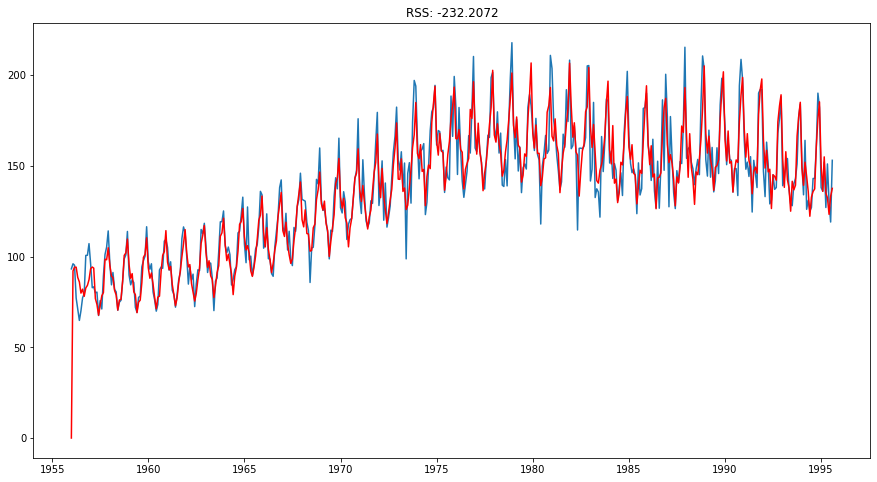

In [62]:
sarimax=sm.tsa.statespace.SARIMAX(df['Monthly_beer_production'],order=(2,0,2),seasonal_order=(2,0,2,12))
result_sar=sarimax.fit()
plt.plot(df['Monthly_beer_production'])
plt.plot(result_sar.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((result_sar.fittedvalues - df['Monthly_beer_production'])))
print('Plotting SARIMAX Model')

<AxesSubplot:xlabel='Month'>

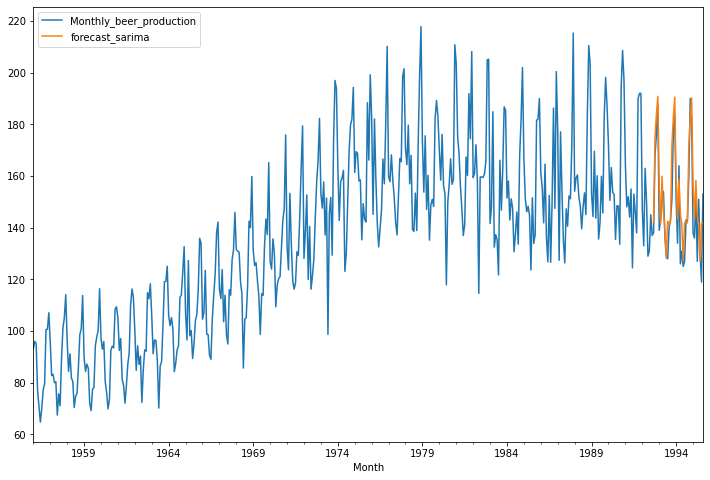

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [63]:
df['forecast_sarima']=result_sar.predict(start=440,end=476,dynamic=True)
df[['Monthly_beer_production','forecast_sarima']].plot(figsize=(12,8))

In [28]:
future_dataframe_monthly

,Monthly_beer_production,Beer_prod_difference,forecast_arima
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,NaN,NaN
1956-04-01,77.1,-16.1,NaN
1956-05-01,70.9,-25.1,NaN
...,...,...,...
1997-04-01,NaN,NaN,146.081098
1997-05-01,NaN,NaN,146.043776
1997-06-01,NaN,NaN,146.006514
1997-07-01,NaN,NaN,145.969310


<AxesSubplot:>

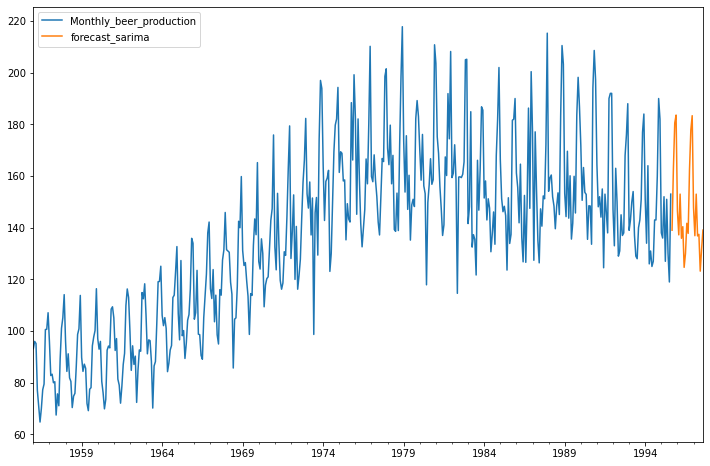

In [64]:
future_dataframe_monthly['forecast_sarima']=result_sar.predict(start=476,end=500,dynamic=True)
future_dataframe_monthly[['Monthly_beer_production','forecast_sarima']].plot(figsize=(12,8))

In [65]:
result_sar.forecast(12)

1995-09-01    139.033097
1995-10-01    162.881438
1995-11-01    180.517710
1995-12-01    183.603060
1996-01-01    146.528644
1996-02-01    137.235763
1996-03-01    153.010148
1996-04-01    135.906809
1996-05-01    140.403724
1996-06-01    124.657251
1996-07-01    130.033709
1996-08-01    141.714263
Freq: MS, Name: predicted_mean, dtype: float64

In [66]:
future_dataframe_monthly.tail(30)

,Monthly_beer_production,Beer_prod_difference,forecast_arima,forecast_sarima
1995-03-01,152.0,-30.0,NaN,NaN
1995-04-01,127.0,-11.0,NaN,NaN
1995-05-01,151.0,15.0,NaN,NaN
1995-06-01,130.0,-22.0,NaN,NaN
1995-07-01,119.0,-8.0,NaN,NaN
1995-08-01,153.0,2.0,NaN,NaN
1995-09-01,NaN,NaN,150.883377,139.033097
1995-10-01,NaN,NaN,148.472088,162.881438
1995-11-01,NaN,NaN,147.440224,180.517710
1995-12-01,NaN,NaN,146.985938,183.603060
